# Combine EDA & Feature Engineering

## Contents
- [Data Import](#import)
- [Exploring Datatime Correlation](#dt)
    - [Seasonality (Rain)](#rain)
    - [Seasonality (Temperature)](#temp)
    - [Seasonality (Wind Speed)](#wind)
- [Preprocessing](#pre)
- [Data Export](#export)

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 

import time
import datetime as dt

sns.set_style("whitegrid")
%matplotlib inline

### Data Import<a id='import'></a>

In [2]:
spray = pd.read_csv('./assets/spray_clean.csv')
weather = pd.read_csv('./assets/weather_clean.csv')
train = pd.read_csv('./assets/train_clean.csv')
test = pd.read_csv('./assets/test_clean.csv')

In [3]:
spray.head()

,date,time,latitude,longitude,year,month,day,wday,hour,coords_lat,coords_long
0,2011-08-29,18:56:58,42.391623,-88.089163,2011,8,29,0,18,5.219824e+06,-9.806041e+06
1,2011-08-29,18:57:08,42.391348,-88.089163,2011,8,29,0,18,5.219783e+06,-9.806041e+06
2,2011-08-29,18:57:18,42.391022,-88.089157,2011,8,29,0,18,5.219734e+06,-9.806040e+06
3,2011-08-29,18:57:28,42.390637,-88.089158,2011,8,29,0,18,5.219676e+06,-9.806040e+06
4,2011-08-29,18:57:38,42.390410,-88.088858,2011,8,29,0,18,5.219642e+06,-9.806007e+06


In [4]:
weather.head()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
0,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27,9.2,2007,5,1
1,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25,9.6,2007,5,1
2,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4,13.4,2007,5,2
3,2007-05-02,60.0,43.0,52.0,42.0,47.0,13.0,0.0,0.0,29.44,30.08,13.3,2,13.4,2007,5,2
4,2007-05-03,66.0,46.0,56.0,40.0,48.0,9.0,0.0,0.0,29.39,30.12,11.7,7,11.9,2007,5,3


In [5]:
train.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,day_of_week
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007,May,29,Tue
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,2007,May,29,Tue
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,2007,May,29,Tue
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007,May,29,Tue
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,2007,May,29,Tue


In [6]:
test.head()

,Id,date,species,trap,latitude,longitude,year,month,day,day_of_week
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,Jun,11,Wed
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,Jun,11,Wed
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,2008,Jun,11,Wed
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,2008,Jun,11,Wed
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,2008,Jun,11,Wed


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          10506 non-null  object 
 1   species       10506 non-null  object 
 2   trap          10506 non-null  object 
 3   latitude      10506 non-null  float64
 4   longitude     10506 non-null  float64
 5   nummosquitos  10506 non-null  int64  
 6   wnvpresent    10506 non-null  int64  
 7   year          10506 non-null  int64  
 8   month         10506 non-null  object 
 9   day           10506 non-null  int64  
 10  day_of_week   10506 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 903.0+ KB


## Exploring Datetime Correlation<a id='dt'></a>

### Seasonality (Rain)<a id='rain'></a>

In [8]:
# Convert weather date to datetime
weather['Date'] = pd.to_datetime(weather['Date'])
train['date'] = pd.to_datetime(train['date'])

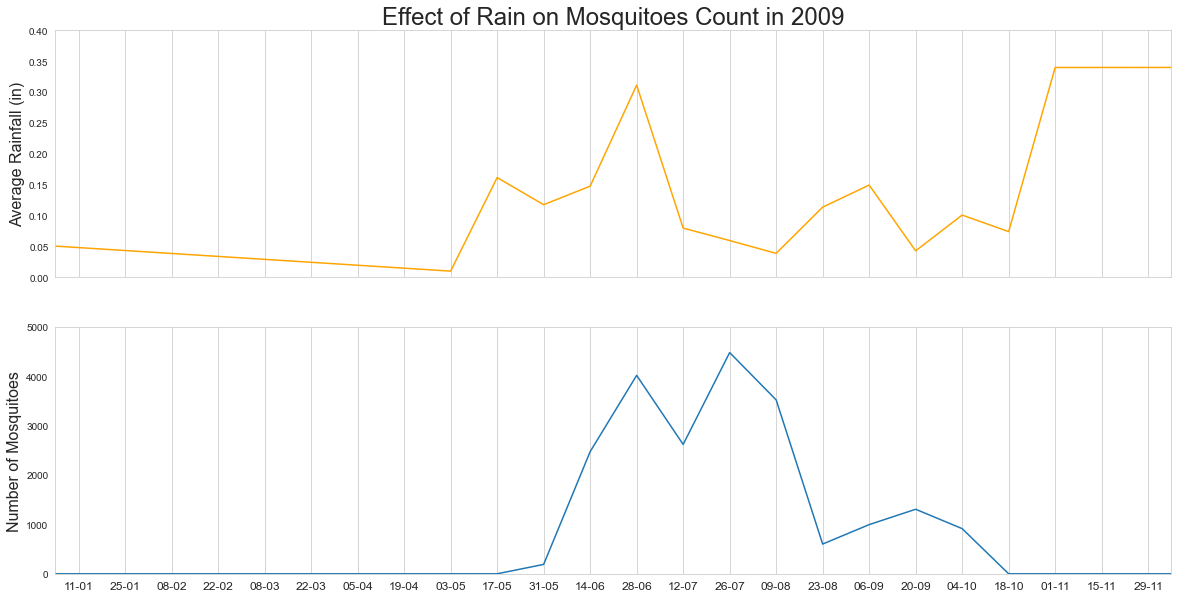

In [9]:
# Effect of rain on mosquitoes count 
fig, ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True)

# Plot rainfall resampled at 2-week interval
weather.set_index('Date').resample('2W').mean()['PrecipTotal'].interpolate(method='time').plot(ax=ax[0], 
                                                                                        color='orange')
ax[0].set_ylabel('Average Rainfall (in)', fontsize=16)
ax[0].set_ylim(0, 0.4)
ax[0].grid(axis='y')
ax[0].set_title('Effect of Rain on Mosquitoes Count in 2009', fontsize=24)

# Plot number of mosquitoes
train.set_index('date').resample('2W').sum()['nummosquitos'].interpolate(method='time').plot(ax=ax[1])
ax[1].set_ylim(0, 5000)
ax[1].grid(axis='y')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Mosquitoes', fontsize=16)


timeframe = pd.date_range('2007-06-01', '2013-10-01', freq='2W')
plt.xticks(ticks=timeframe, labels=[x.strftime('%d-%m') for x in timeframe], fontsize=12)
plt.xlim('2009-01-01', '2009-12-01')

plt.show()

The above graph shows the relationship between average rainfall and number of mosquitoes in 2009. As soon as rainfall started picking up in May, number of mosquitoes started to rise in June. There seems to be a 2-4 week lag between the increase in average rainfall and increase in mosquitoes.

### Seasonality (Temperature)<a id='temp'></a>

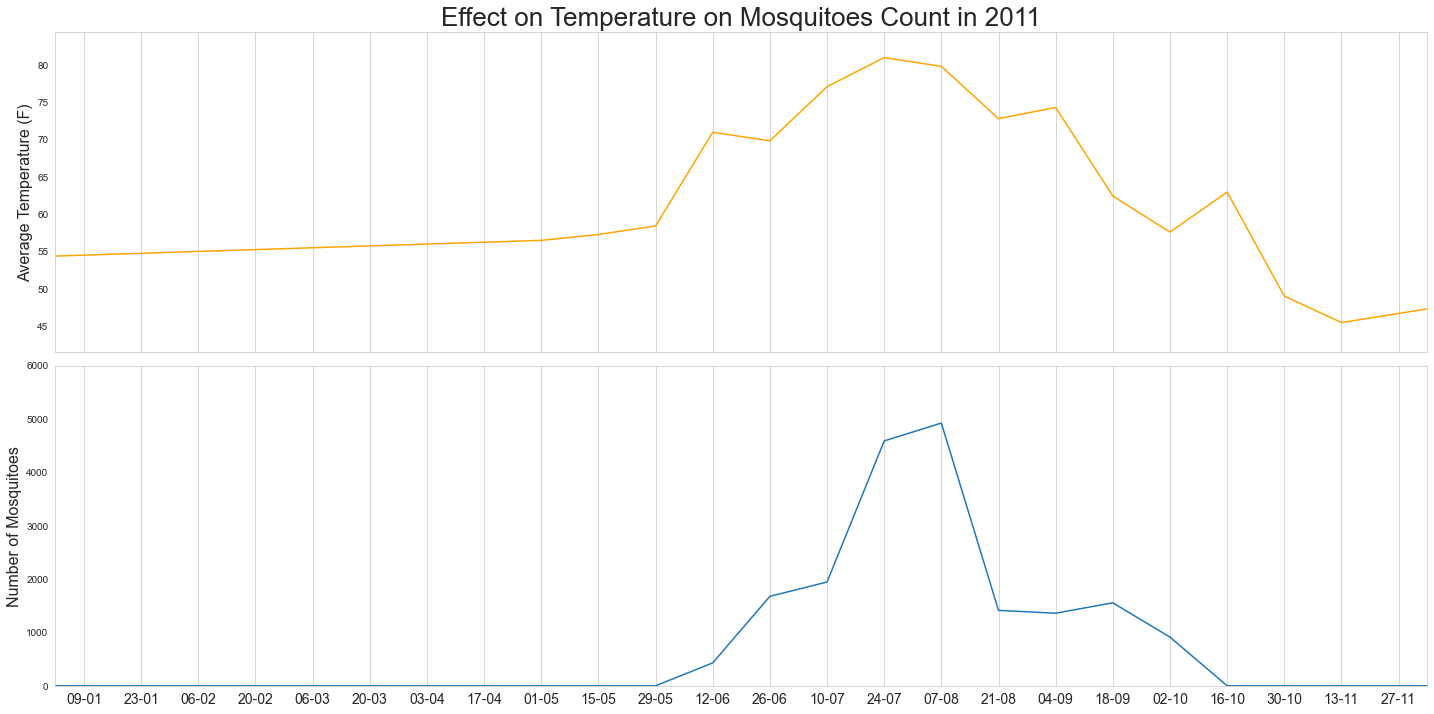

In [10]:
# Effect of temperature on mosquitoes count
fig, ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True)

# Plot temperature resampled at 2-week interval
weather.set_index('Date').resample('2W').mean()['Tavg'].interpolate(method='time').plot(ax=ax[0], 
                                                                                        color='orange')
ax[0].set_ylabel('Average Temperature (F)', fontsize=16)
ax[0].tick_params(axis='x', which='minor', bottom=False)
ax[0].grid(axis='y')
ax[0].set_title('Effect on Temperature on Mosquitoes Count in 2011', fontsize=26)

# Plot number of mosquitoes
train.set_index('date').resample('2W').sum()['nummosquitos'].interpolate(method='time').plot(ax=ax[1])
ax[1].set_ylabel('Number of Mosquitoes', fontsize=16)
ax[1].grid(axis='y')
ax[1].set_xlabel('')
ax[1].set_ylim(0, 6000)
#timeframe = pd.date_range('2007-06-01', '2013-10-01', freq='2M')
timeframe = pd.date_range('2007-06-01', '2013-10-01', freq='2W')
plt.xticks(ticks=timeframe, labels=[x.strftime('%d-%m') for x in timeframe], fontsize=14)
plt.xlim('2011-01-01', '2011-12-01')

plt.tight_layout(pad=1)
plt.show()

As temperature rises in Chicago, the number of mosquitoes rise as well, indicating that these mosquitoes thrive in warmer climate. There seems to be a 2-week lag between the increase in average temperature and increase in mosquitoes.

Based on external research, it takes time for mosquitoes to breed and another 7-10 days for an egg to develop into an adult mosquito. [(Source)](https://www.cdc.gov/mosquitoes/about/life-cycles/culex.html)

### Seasonality (Wind Speed)<a id='wind'></a>

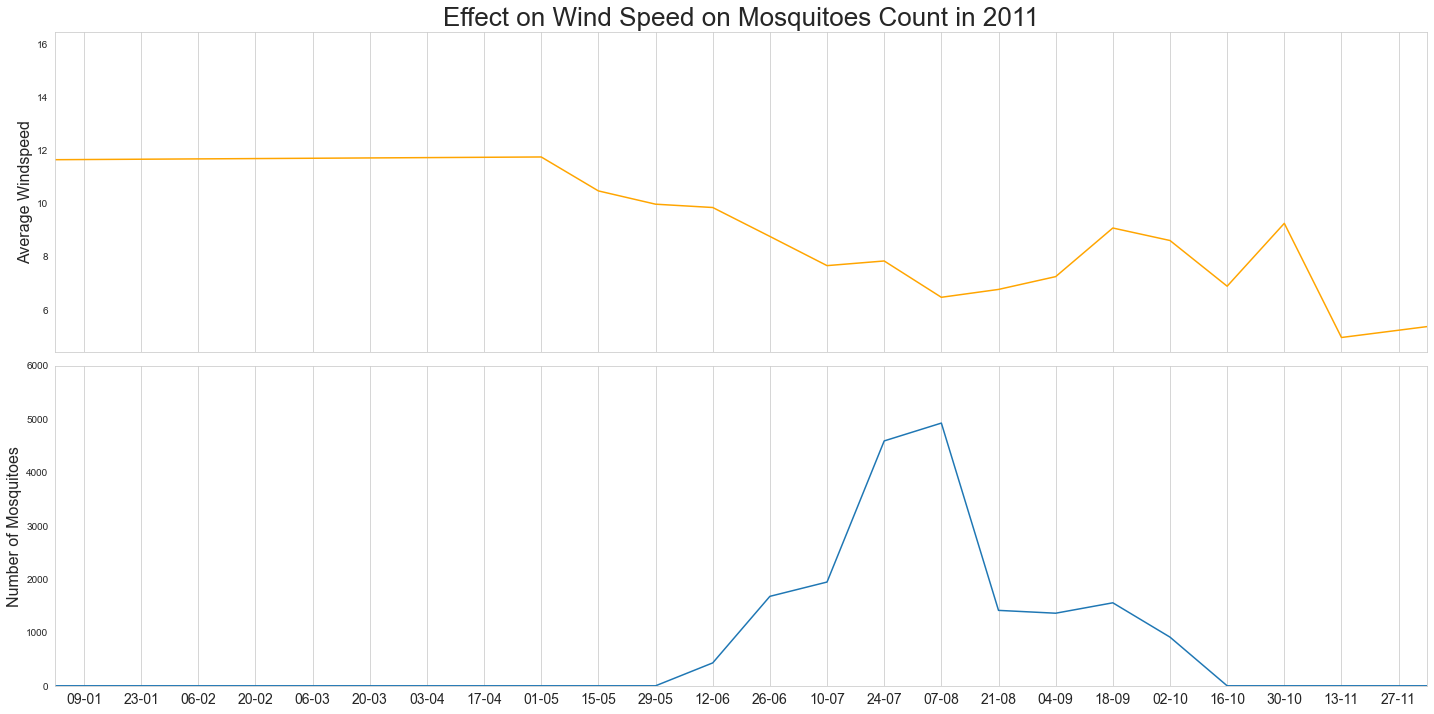

In [11]:
# Effect of average wind speed on mosquitoes count
fig, ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True)

# Plot temperature resampled at 2-week interval
weather.set_index('Date').resample('2W').mean()['AvgSpeed'].interpolate(method='time').plot(ax=ax[0], 
                                                                                        color='orange')
ax[0].set_ylabel('Average Windspeed', fontsize=16)
ax[0].tick_params(axis='x', which='minor', bottom=False)
ax[0].grid(axis='y')
ax[0].set_title('Effect on Wind Speed on Mosquitoes Count in 2011', fontsize=26)

# Plot number of mosquitoes
train.set_index('date').resample('2W').sum()['nummosquitos'].interpolate(method='time').plot(ax=ax[1])
ax[1].set_ylabel('Number of Mosquitoes', fontsize=16)
ax[1].grid(axis='y')
ax[1].set_xlabel('')
ax[1].set_ylim(0, 6000)
#timeframe = pd.date_range('2007-06-01', '2013-10-01', freq='2M')
timeframe = pd.date_range('2007-06-01', '2013-10-01', freq='2W')
plt.xticks(ticks=timeframe, labels=[x.strftime('%d-%m') for x in timeframe], fontsize=14)
plt.xlim('2011-01-01', '2011-12-01')

plt.tight_layout(pad=1)
plt.show()

There seems to be a negative correlation between average wind speed and number of mosquitoes. Mosquitoes seem to thrive when the average windspeed falls. This is in line with research that shows that mosquitoes don’t fly or locate potential hosts well when wind speeds are greater than ~10 MPH. [(Source)](https://www.controlsolutionsinc.com/news/6-things-you-may-not-know-about-mosquitoes/)

## Preprocessing<a id='pre'></a>

#### Prepare weather dataset for modelling:

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2944 non-null   datetime64[ns]
 1   Tmax         2944 non-null   float64       
 2   Tmin         2944 non-null   float64       
 3   Tavg         2933 non-null   float64       
 4   DewPoint     2944 non-null   float64       
 5   WetBulb      2940 non-null   float64       
 6   Heat         2933 non-null   float64       
 7   Cool         2933 non-null   float64       
 8   PrecipTotal  2942 non-null   float64       
 9   StnPressure  2940 non-null   float64       
 10  SeaLevel     2935 non-null   float64       
 11  ResultSpeed  2944 non-null   float64       
 12  ResultDir    2944 non-null   int64         
 13  AvgSpeed     2941 non-null   float64       
 14  Year         2944 non-null   int64         
 15  Month        2944 non-null   int64         
 16  Day   

In [13]:
weather.head()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
0,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27,9.2,2007,5,1
1,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25,9.6,2007,5,1
2,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4,13.4,2007,5,2
3,2007-05-02,60.0,43.0,52.0,42.0,47.0,13.0,0.0,0.0,29.44,30.08,13.3,2,13.4,2007,5,2
4,2007-05-03,66.0,46.0,56.0,40.0,48.0,9.0,0.0,0.0,29.39,30.12,11.7,7,11.9,2007,5,3


As there are 2 different rows for each date (from the 2 weather stations), we will be taking the average so that we have 1 row per day which we can then merge with our train set.

In [14]:
weather_clean = weather.groupby('Date').mean().reset_index()

In [15]:
# Convert year, month, day to int
weather_clean['Year'] = weather_clean['Year'].astype(int)
weather_clean['Month'] = weather_clean['Month'].astype(int)
weather_clean['Day'] = weather_clean['Day'].astype(int)

In [16]:
# Convert columns to lower case
weather_clean.columns = weather_clean.columns.str.lower()
weather_clean.head()

,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0000,29.140,29.820,2.20,26.0,9.40,2007,5,1
1,2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0000,29.410,30.085,13.15,3.0,13.40,2007,5,2
2,2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0000,29.425,30.120,12.30,6.5,12.55,2007,5,3
3,2007-05-04,72.0,50.0,58.0,41.5,50.0,7.0,0.0,0.0025,29.335,30.045,10.25,7.5,10.60,2007,5,4
4,2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,0.0050,29.430,30.095,11.45,7.0,11.75,2007,5,5


#### Create lag weather features based on EDA:

In [17]:
# Create df for weather features we want to apply the the time lag on
cols = ['Tavg', 'PrecipTotal']
lag_features = weather[cols]

# Set number of lags based on EDA above
lags = (7, 10, 14)
weather_clean = weather_clean.assign(**{f'{col}_lag_{n}':
                            lag_features[col].shift(n) for n in lags for col in lag_features})

In [18]:
# Double check weather df
weather_clean.head(20)

,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,...,avgspeed,year,month,day,Tavg_lag_7,PrecipTotal_lag_7,Tavg_lag_10,PrecipTotal_lag_10,Tavg_lag_14,PrecipTotal_lag_14
0,2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0000,29.140,...,9.40,2007,5,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0000,29.410,...,13.40,2007,5,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0000,29.425,...,12.55,2007,5,3,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-05-04,72.0,50.0,58.0,41.5,50.0,7.0,0.0,0.0025,29.335,...,10.60,2007,5,4,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,0.0050,29.430,...,11.75,2007,5,5,NaN,NaN,NaN,NaN,NaN,NaN
5,2007-05-06,68.0,50.5,59.5,30.0,46.0,5.5,0.0,0.0000,29.595,...,14.75,2007,5,6,NaN,NaN,NaN,NaN,NaN,NaN
6,2007-05-07,83.5,48.5,66.0,40.0,53.5,0.0,1.0,0.0025,29.410,...,10.20,2007,5,7,NaN,NaN,NaN,NaN,NaN,NaN
7,2007-05-08,81.0,57.0,69.0,57.5,62.5,0.0,4.0,0.0025,29.325,...,5.60,2007,5,8,67.0,0.000,NaN,NaN,NaN,NaN
8,2007-05-09,76.5,62.0,69.5,59.5,63.0,0.0,4.5,0.0750,29.245,...,6.05,2007,5,9,68.0,0.000,NaN,NaN,NaN,NaN
9,2007-05-10,83.5,57.5,70.5,52.0,60.5,0.0,5.5,0.0000,29.230,...,4.00,2007,5,10,51.0,0.000,NaN,NaN,NaN,NaN


#### Merge train set with weather data:

In [19]:
# Convert data types for merging
weather_clean['date'] = weather_clean['date'].astype(str)
train['date'] = train['date'].astype(str)
test['date'] = test['date'].astype(str)

# Drop year, month, day in weather 
weather_clean.drop(['year','month','day'], axis=1, inplace=True)

In [20]:
# Merging of train set with weather data
train = pd.merge(train, weather_clean, how='left', on='date')

# Merging of test set with weather data
test = pd.merge(test, weather_clean, how='left', on='date')

In [21]:
train.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,...,sealevel,resultspeed,resultdir,avgspeed,Tavg_lag_7,PrecipTotal_lag_7,Tavg_lag_10,PrecipTotal_lag_10,Tavg_lag_14,PrecipTotal_lag_14
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007,May,29,...,30.1,5.8,17.0,6.95,61.0,0.0,70.0,0.0,68.0,0.0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,2007,May,29,...,30.1,5.8,17.0,6.95,61.0,0.0,70.0,0.0,68.0,0.0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,2007,May,29,...,30.1,5.8,17.0,6.95,61.0,0.0,70.0,0.0,68.0,0.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007,May,29,...,30.1,5.8,17.0,6.95,61.0,0.0,70.0,0.0,68.0,0.0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,2007,May,29,...,30.1,5.8,17.0,6.95,61.0,0.0,70.0,0.0,68.0,0.0


In [22]:
test.head()

,Id,date,species,trap,latitude,longitude,year,month,day,day_of_week,...,sealevel,resultspeed,resultdir,avgspeed,Tavg_lag_7,PrecipTotal_lag_7,Tavg_lag_10,PrecipTotal_lag_10,Tavg_lag_14,PrecipTotal_lag_14
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,Jun,11,Wed,...,29.98,9.15,18.0,10.2,64.0,0.09,72.0,0.0,75.0,0.45
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,Jun,11,Wed,...,29.98,9.15,18.0,10.2,64.0,0.09,72.0,0.0,75.0,0.45
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,2008,Jun,11,Wed,...,29.98,9.15,18.0,10.2,64.0,0.09,72.0,0.0,75.0,0.45
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,2008,Jun,11,Wed,...,29.98,9.15,18.0,10.2,64.0,0.09,72.0,0.0,75.0,0.45
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,2008,Jun,11,Wed,...,29.98,9.15,18.0,10.2,64.0,0.09,72.0,0.0,75.0,0.45


In [23]:
train.shape

(10506, 30)

In [24]:
test.shape

(116293, 29)

## Data Export<a id='export'></a>

In [25]:
# Export cleaned and engineered datasets to CSV
train.to_csv('./assets/train_final.csv', index=False)
test.to_csv('./assets/test_final.csv', index=False)